In [17]:
import pandas as pd

# Ruta del archivo CSV
file_path = "timelapseDevolucionAProceso/timelapseDevProceso.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Realizar las operaciones necesarias con el DataFrame
# ...

# Mostrar el DataFrame resultante
print(df)

       folio_recepcion             fecha_recepcion  estado_final_lm  count
0           2024001089  2024-05-02 08:31:00.000000              6.0      1
1           2024001092  2024-05-07 19:22:00.000000              4.0      1
2           2024001094  2024-05-08 18:08:00.000000              6.0      1
3           2024001101  2024-05-14 20:27:00.000000              6.0      1
4           2024001107  2024-05-23 09:09:00.000000              6.0      1
...                ...                         ...              ...    ...
15661       2024499995  2024-05-20 00:01:00.000000              6.0      1
15662       2024499996  2024-05-20 00:01:00.000000              6.0      1
15663       2024499997  2024-05-20 00:01:00.000000              6.0      1
15664       2024499998  2024-05-20 00:01:00.000000              6.0      1
15665       2024500000  2024-05-20 00:01:00.000000              6.0      1

[15666 rows x 4 columns]


In [18]:
df['fecha_recepcion'] = pd.to_datetime(df['fecha_recepcion'])

#normaliza el horario a horario chileno
df['fecha_recepcion_adjusted'] = df['fecha_recepcion'] - pd.Timedelta(hours=4)

#ajusta la fecha acorde al contrato. Despues de las 5 corresponde al día siguiente, si es viernes despues de 5 es lunes
df['contract_date'] = df['fecha_recepcion_adjusted']
df.loc[df['contract_date'].dt.hour >= 17, 'contract_date'] += pd.Timedelta(days=1)
df.loc[df['contract_date'].dt.dayofweek == 5, 'contract_date'] += pd.Timedelta(days=2)
df['contract_date'] = df['contract_date'].dt.date

df



,folio_recepcion,fecha_recepcion,estado_final_lm,count,fecha_recepcion_adjusted,contract_date
0,2024001089,2024-05-02 08:31:00,6.0,1,2024-05-02 04:31:00,2024-05-02
1,2024001092,2024-05-07 19:22:00,4.0,1,2024-05-07 15:22:00,2024-05-07
2,2024001094,2024-05-08 18:08:00,6.0,1,2024-05-08 14:08:00,2024-05-08
3,2024001101,2024-05-14 20:27:00,6.0,1,2024-05-14 16:27:00,2024-05-14
4,2024001107,2024-05-23 09:09:00,6.0,1,2024-05-23 05:09:00,2024-05-23
...,...,...,...,...,...,...
15661,2024499995,2024-05-20 00:01:00,6.0,1,2024-05-19 20:01:00,2024-05-20
15662,2024499996,2024-05-20 00:01:00,6.0,1,2024-05-19 20:01:00,2024-05-20
15663,2024499997,2024-05-20 00:01:00,6.0,1,2024-05-19 20:01:00,2024-05-20
15664,2024499998,2024-05-20 00:01:00,6.0,1,2024-05-19 20:01:00,2024-05-20


In [19]:

df['estado_final_lm'].fillna('S/P', inplace=True)

# date_to_compare = datetime.strptime('2024-05-22', '%Y-%m-%d').date()

# df2 = df[df['contract_date'].isin(df_after_may_22['contract_date'])]

# df2


C:\Users\esaez\AppData\Local\Temp\ipykernel_9372\3479116090.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'S/P' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['estado_final_lm'].fillna('S/P', inplace=True)


In [23]:
from datetime import datetime
import matplotlib.pyplot as plt

# Group the dataframe by "contract_date" and count the occurrences of each "estado_final_lm"
grouped_df = df.groupby('contract_date')['estado_final_lm'].value_counts().unstack().fillna(0)

grouped_df_complete = df.groupby('contract_date')['estado_final_lm'].value_counts().unstack().fillna(0)

grouped_df_complete['total'] = grouped_df_complete.sum(axis=1)

# Calculamos la fila total sumando cada columna del DataFrame
total_row = grouped_df_complete.sum(axis=0)

# Añadimos la fila total al final del DataFrame
grouped_df_complete.loc['total'] = total_row

grouped_df_complete





estado_final_lm,3.0,4.0,6.0,S/P,total
contract_date,,,,,
2024-05-01,13.0,0.0,9.0,0.0,22.0
2024-05-02,307.0,32.0,333.0,0.0,672.0
2024-05-03,473.0,66.0,259.0,0.0,798.0
2024-05-06,440.0,44.0,290.0,0.0,774.0
2024-05-07,354.0,33.0,408.0,0.0,795.0
2024-05-08,518.0,47.0,320.0,0.0,885.0
2024-05-09,376.0,27.0,449.0,0.0,852.0
2024-05-10,355.0,22.0,261.0,0.0,638.0
2024-05-13,383.0,20.0,458.0,0.0,861.0


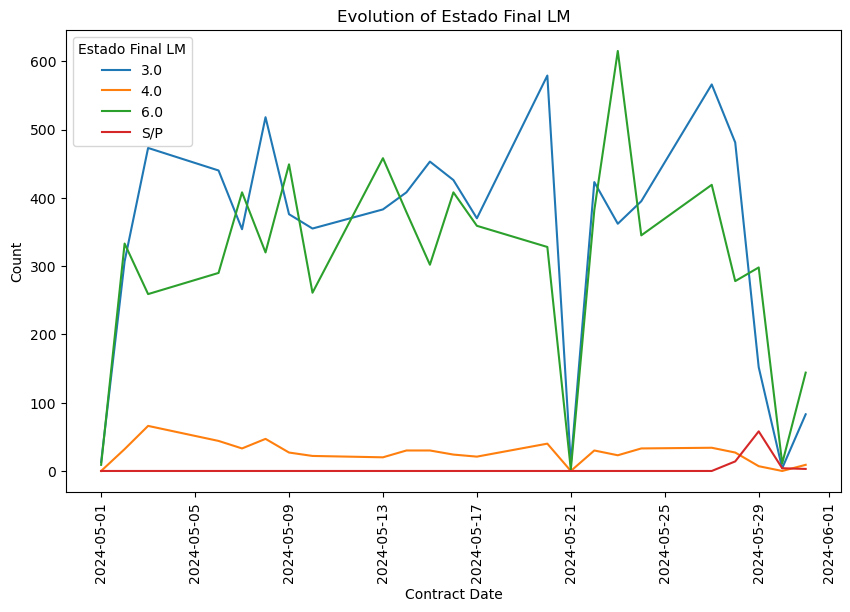

In [24]:

# Plot the graph
grouped_df.plot(kind='line', figsize=(10, 6))
plt.xlabel('Contract Date')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.title('Evolution of Estado Final LM')
plt.legend(title='Estado Final LM')
plt.show()
